# Required Capstone Component 12.1

In [147]:
# Import any necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel, ConstantKernel as C, Matern
from scipy.stats import norm
from statistics import mean
import itertools
import math


# load initial inputs
x_1 = np.load("initial_data/function_1/initial_inputs.npy")
x_2 = np.load("initial_data/function_2/initial_inputs.npy")
x_3 = np.load("initial_data/function_3/initial_inputs.npy")
x_4 = np.load("initial_data/function_4/initial_inputs.npy")
x_5 = np.load("initial_data/function_5/initial_inputs.npy")
x_6 = np.load("initial_data/function_6/initial_inputs.npy")
x_7 = np.load("initial_data/function_7/initial_inputs.npy")
x_8 = np.load("initial_data/function_8/initial_inputs.npy")

# load initial outputs
y_1 = np.load("initial_data/function_1/initial_outputs.npy")
y_2 = np.load("initial_data/function_2/initial_outputs.npy")
y_3 = np.load("initial_data/function_3/initial_outputs.npy")
y_4 = np.load("initial_data/function_4/initial_outputs.npy")
y_5 = np.load("initial_data/function_5/initial_outputs.npy")
y_6 = np.load("initial_data/function_6/initial_outputs.npy")
y_7 = np.load("initial_data/function_7/initial_outputs.npy")
y_8 = np.load("initial_data/function_8/initial_outputs.npy")

## Function 1:

A function with a 2D input and 1D output. 

*Application: Detect likely contamination sources in a two-dimensional area, such as a radiation field, where only proximity yields a non-zero reading. The system uses Bayesian optimisation to tune detection parameters and reliably identify both strong and weak sources.*

I will use a Matern kernel because it is a generalisation of RBF and allows you to control for smoothness; and because the application is spatial, and the Matern kernel originated from spatial statistics. The Matern function has two parameters: length scale and $\nu$. Length scale is the correlation decay parameter, and $\nu$ controls the smoothness. 

The larger the length scale, the more correlated far away points are, while smaller values of length scales means the correlation between points decays faster with distance. 

$\nu = 1.5$ corresponds to once differentiable functions, and $\nu = 2.5$ corresponds to twice differentiable functions. As $\nu$ tends towards infinity, the kernel becomes equivalent to the RBF kernel. So, the smaller $\nu$, the less smooth the function.

Source: https://scikit-learn.org/stable/modules/generated/sklearn.gaussian_process.kernels.Matern.html

In [99]:
#look at the data
print(x_1)
print(y_1)

# look at average distance between points

# Get all unique combinations of length 2
pairs_1 = itertools.permutations(x_1[0], 2)
pairs_2 = itertools.permutations(x_1[1], 2)
# Calculate the absolute difference for each pair
differences_1 = [(p[0] - p[1])**2 for p in pairs_1]
differences_2 = [(p[0] - p[1])**2 for p in pairs_2]
# Calculate the average of the differences
average_difference_1 = sum(differences_1) / len(differences_1)
average_difference_2 = sum(differences_2) / len(differences_2)
print(average_difference_1)
print(average_difference_2)

[[0.31940389 0.76295937]
 [0.57432921 0.8798981 ]
 [0.73102363 0.73299988]
 [0.84035342 0.26473161]
 [0.65011406 0.68152635]
 [0.41043714 0.1475543 ]
 [0.31269116 0.07872278]
 [0.68341817 0.86105746]
 [0.08250725 0.40348751]
 [0.88388983 0.58225397]]
[ 1.32267704e-079  1.03307824e-046  7.71087511e-016  3.34177101e-124
 -3.60606264e-003 -2.15924904e-054 -2.08909327e-091  2.53500115e-040
  3.60677119e-081  6.22985647e-048]
0.19674146865507672
0.09337234682583528


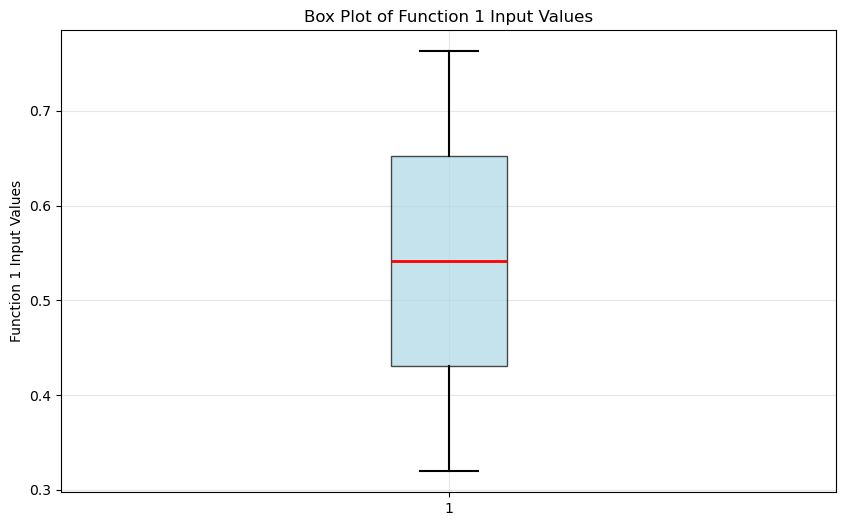

Function 1 Input Values Statistics:
Mean: 0.5411816315539163
Std: 0.22177774271501904
Min: 0.31940388883889725
Max: 0.7629593742689353
Range: 0.4435554854300381


In [126]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(x_1[0], vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 1 Input Values')
plt.title('Box Plot of Function 1 Input Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 1 Input Values Statistics:")
print("Mean:", np.mean(x_1[0]))
print("Std:", np.std(x_1[0]))
print("Min:", np.min(x_1[0]))
print("Max:", np.max(x_1[0]))
print("Range:", np.max(x_1[0]) - np.min(x_1[0]))


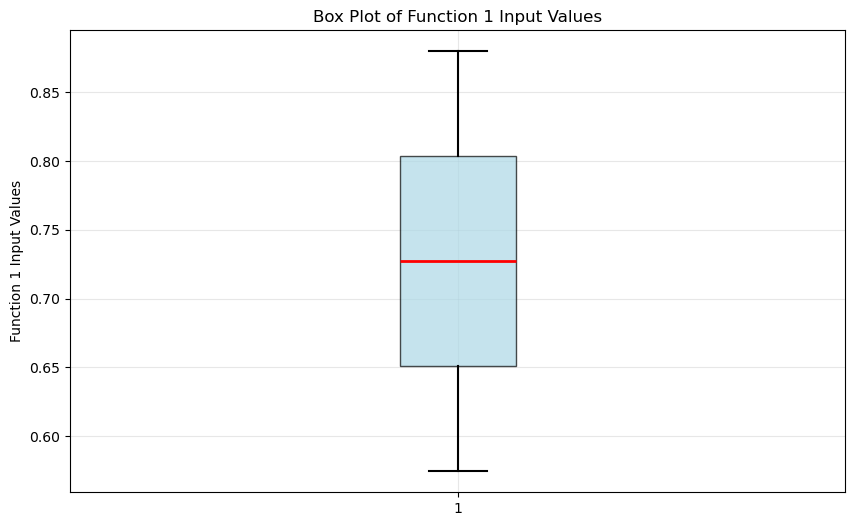

Function 1 Input Values Statistics:
Mean: 0.7271136597470941
Std: 0.15278444523726498
Min: 0.5743292145098291
Max: 0.879898104984359
Range: 0.30556889047452995


In [127]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(x_1[1], vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 1 Input Values')
plt.title('Box Plot of Function 1 Input Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 1 Input Values Statistics:")
print("Mean:", np.mean(x_1[1]))
print("Std:", np.std(x_1[1]))
print("Min:", np.min(x_1[1]))
print("Max:", np.max(x_1[1]))
print("Range:", np.max(x_1[1]) - np.min(x_1[1]))


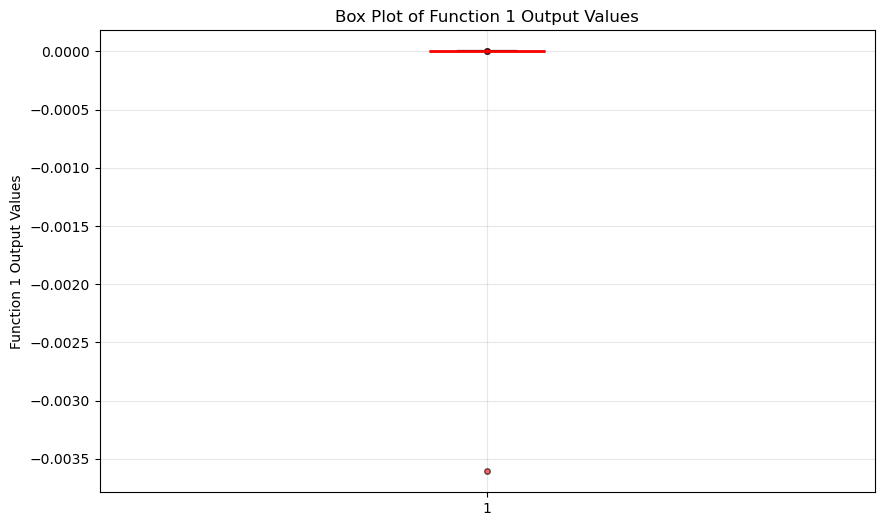

Function 1 Output Values Statistics:
Mean: -0.00036060626443627054
Std: 0.0010818187933090686
Min: -0.0036060626443634764
Max: 7.710875114502849e-16
Range: 0.0036060626443642474


In [128]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(y_1, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Function 1 Output Values')
plt.title('Box Plot of Function 1 Output Values')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Function 1 Output Values Statistics:")
print("Mean:", np.mean(y_1))
print("Std:", np.std(y_1))
print("Min:", np.min(y_1))
print("Max:", np.max(y_1))
print("Range:", np.max(y_1) - np.min(y_1))


The average square difference between in x[0] is around 0.2, and the average difference between points in x[1] is 0.10. The reason I chose square difference is because of the inverse square law (https://en.wikipedia.org/wiki/Inverse-square_law). Based off this information and the fact that radiation decays rapidly over space (CHECK), I chose fairly low length scale values. I also adjusted them until they were small enough so that the chosen query point was not at the edge of the domain (x[0] and x[1] taking values of either 0 or 1).

Once I settled on length scale, I attempted three different common values for nu: 0.5, 1.5 and 2.5. 1.5 and 2.5 gave similar points, so I chose the most common choice, 1.5. 

Kappa, the parameter balancing exploitation and explorartion, was chosen by looking first looking at the average posterior mean estimates and the average posterior standard deviation estimates. The posterior means were very small compared to the posterior standard deviation, so kappa needs to be small as well so that the standard deviation did not over power the mean, thus prioritising exploration only. I chose kappa so that exploration and exploitation are balanced better, but exploration is prioritised because there are likely to be a couple of localised peak, relating to areas of high radiocativity, and everywhere else will have very low radioactivity.

In [162]:
# GP assumption
noise_assumption = 1e-10

# kernel parameters
length_scale = [0.01, 0.01]
nu = 1.5

# set up evaluation grid:
x_11 = np.linspace(0, 1, 100)
x_12 = np.linspace(0, 1, 100)
x_11, x_12 = np.meshgrid(x_11, x_12)
x_1_grid = np.column_stack([x_11.ravel(), x_12.ravel()])

# Define and fit GP
kernel = Matern(length_scale = length_scale, nu = nu)
model = GaussianProcessRegressor(kernel = kernel, alpha = noise_assumption)
model.fit(np.array(x_1), np.array(y_1))


# Get the predicted (posterior) mean and standard deviation for each grid point
post_mean, post_std = model.predict(x_1_grid, return_std = True)
print("average posterior mean:", mean(post_mean))
print("average posterior standard deviation:", mean(post_std))

# Calculate the UCB aquisition function
kappa =  1e-4 # choose this by looking at the mean post_mean and post_std to get an idea of the scale of each
UCB = post_mean + kappa * post_std

# Get the next query point
max_idx_1 = np.argmax(UCB)  
next_point_1 = x_1_grid[max_idx_1] 
print("Best known point:", x_1[np.argmax(y_1)])
print("Next query point:", next_point_1)


average posterior mean: -2.2121887823192958e-06
average posterior standard deviation: 0.9986634095662825
Best known point: [0.73102363 0.73299988]
Next query point: [0.7979798  0.76767677]


Plotting the posterior mean below, the plot is very similar to the plot y_1 seen above. This is to be expected, since the Gaussian Process is being used to approximate function 1. This plot can help check that my parameter choices for the GP and kernel were appropriate. 

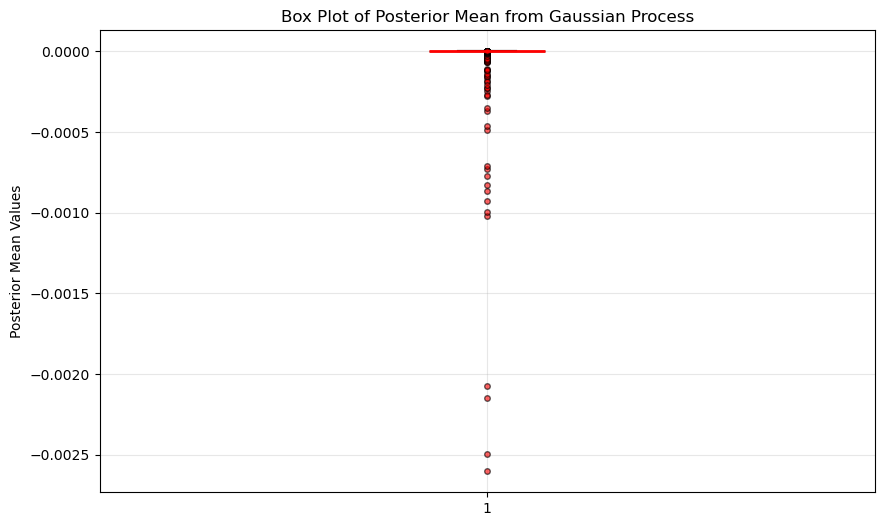

Posterior Mean Statistics:
Mean: -2.2121887823192954e-06
Std: 5.399545691755277e-05
Min: -0.002601866834342887
Max: 1.2862159230489401e-09
Range: 0.00260186812055881


In [142]:
# Create density plot of post_mean
plt.figure(figsize=(10, 6))
plt.boxplot(post_mean, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Mean Values')
plt.title('Box Plot of Posterior Mean from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Mean Statistics:")
print("Mean:", np.mean(post_mean))
print("Std:", np.std(post_mean))
print("Min:", np.min(post_mean))
print("Max:", np.max(post_mean))
print("Range:", np.max(post_mean) - np.min(post_mean))


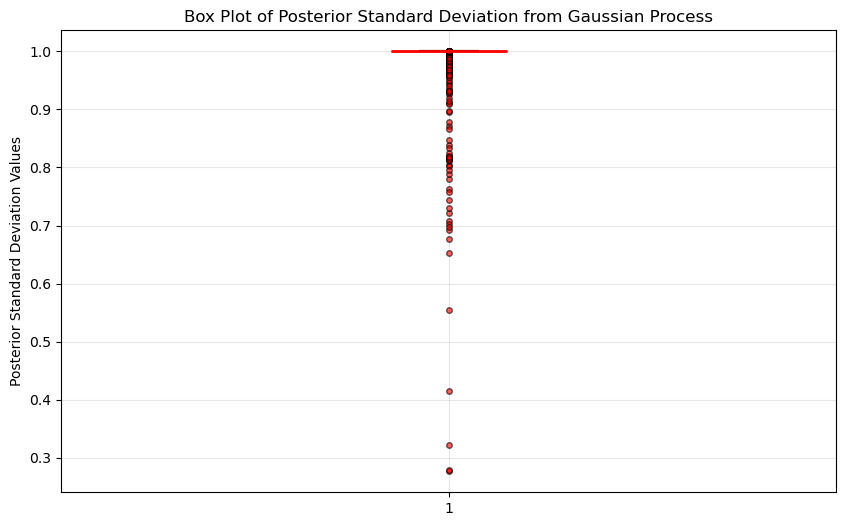

Posterior Standard Deviation Statistics:
Mean: 0.9986634095662826
Std: 0.01930846297001481
Min: 0.27678952475070967
Max: 1.0
Range: 0.7232104752492903


In [143]:
# Create density plot of post_std
plt.figure(figsize=(10, 6))
plt.boxplot(post_std, vert=True, patch_artist=True, 
           boxprops=dict(facecolor='lightblue', alpha=0.7),
           medianprops=dict(color='red', linewidth=2),
           whiskerprops=dict(color='black', linewidth=1.5),
           capprops=dict(color='black', linewidth=1.5),
           flierprops=dict(marker='o', markerfacecolor='red', markersize=4, alpha=0.6))
plt.ylabel('Posterior Standard Deviation Values')
plt.title('Box Plot of Posterior Standard Deviation from Gaussian Process')
plt.grid(True, alpha=0.3)
plt.show()

# Print some statistics
print(f"Posterior Standard Deviation Statistics:")
print("Mean:", np.mean(post_std))
print("Std:", np.std(post_std))
print("Min:", np.min(post_std))
print("Max:", np.max(post_std))
print("Range:", np.max(post_std) - np.min(post_std))


## Function 2:

A function with a 2D input and 1D output. 

*Application: Imagine a black box, or a mystery ML model, that takes two numbers as input and returns a log-likelihood score. Your goal is to maximise that score, but each output is noisy, and depending on where you start, you might get stuck in a local optimum.* 

*To tackle this, you use Bayesian optimisation, which selects the next inputs based on what it has learned so far. It balances exploration with exploitation, making it well suited to noisy outputs and complex functions with many local peaks.*



## Function 3:

A function with a 3D input and 1D output. 

*Application: You’re working on a drug discovery project, testing combinations of three compounds to create a new medicine.*

*Each experiment is stored in initial_inputs.npy as a 3D array, where each row lists the amounts of the three compounds used. After each experiment, you record the number of adverse reactions, stored in initial_outputs.npy as a 1D array.*

*Your goal is to minimise side effects; in this competition, it is framed as maximisation by optimising a transformed output (e.g. the negative of side effects).*

## Function 4:

A function with a 4D input and a 1D output.

*Application: Address the challenge of optimally placing products across warehouses for a business with high online sales, where accurate calculations are costly and only feasible biweekly. To speed up decision-making, an ML model approximates these results within hours. The model has four hyperparameters to tune, and its output reflects the difference from the expensive baseline. Because the system is dynamic and full of local optima, it requires careful tuning and robust validation to find reliable, near-optimal solutions.*

## Function 5:

A function with a 4D input and a 1D output.

*Application: You’re tasked with optimising a four-variable black-box function that represents the yield of a chemical process in a factory. The function is typically unimodal, with a single peak where yield is maximised.*

*Your goal is to find the optimal combination of chemical inputs that delivers the highest possible yield, using systematic exploration and optimisation methods.*

## Function 6:

A function with a 5D input and a 1D output.

*Application: You’re optimising a cake recipe using a black-box function with five ingredient inputs, for example flour, sugar, eggs, butter and milk. Each recipe is evaluated with a combined score based on flavour, consistency, calories, waste and cost, where each factor contributes negative points as judged by an expert taster. This means the total score is negative by design.*

*To frame this as a maximisation problem, your goal is to bring that score as close to zero as possible or, equivalently, to maximise the negative of the total sum.*

## Function 7:

A function with a 6D input and a 1D output.

*Application: You’re tasked with optimising an ML model by tuning six hyperparameters, for example learning rate, regularisation strength or number of hidden layers. The function you’re maximising is the model’s performance score (such as accuracy or F1), but since the relationship between inputs and output isn’t known, it’s treated as a black-box function.*

*Because this is a commonly used model, you might benefit from researching best practices or literature to guide your initial search space. Your goal is to find the combination of hyperparameters that yields the highest possible performance.*

## Function 8:

A function with a 8D input and a 1D output.

*Application: You’re optimising an eight-dimensional black-box function, where each of the eight input parameters affects the output, but the internal mechanics are unknown.*

*Your objective is to find the parameter combination that maximises the function’s output, such as performance, efficiency or validation accuracy. Because the function is high-dimensional and likely complex, global optimisation is hard, so identifying strong local maxima is often a practical strategy.*

*For example, imagine you’re tuning an ML model with eight hyperparameters: learning rate, batch size, number of layers, dropout rate, regularisation strength, activation function (numerically encoded), optimiser type (encoded) and initial weight range. Each input set returns a single validation accuracy score between 0 and 1. Your goal is to maximise this score.*